In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Read data

In [16]:
data_dir = './data/'

In [17]:
dfs = []
trade_phases={
    'austria-2005-2007.xml': 'p1',
    'austria-2008-2012.xml': 'p2',
    'austria-2013-2020.xml': 'p3',
    'austria-2021-2030.xml': 'p4'
}


for file in os.listdir(data_dir):
    if 'austria' in file:
        df = pd.read_xml(os.path.join(data_dir, file))
        phase = trade_phases[file]
        df.columns = [f'{c}_{phase}' if c != 'InstallationName' else c for c in df.columns]
        dfs.append(df)

In [18]:
df = dfs[0]
for i in range(1, len(dfs)):
    df = df.merge(dfs[i], how='outer', on=['InstallationName'])

In [19]:
df = df.sort_index(axis=1)

In [20]:
def combine_names(row, columns_to_combine):
    for col in columns_to_combine:
        if not pd.isna(row[col]):
            return row[col]
    return np.nan

In [21]:
combine_names_dict = {
    'AccountHolderName': ['AccountHolderName_p1', 'AccountHolderName_p2', 'AccountHolderName_p3', 'AccountHolderName_p4'],
    'AccountStatus': ['AccountStatus_p1', 'AccountStatus_p2', 'AccountStatus_p3', 'AccountStatus_p4'],
    'AddressCity': ['AddressCity_p1', 'AddressCity_p2', 'AddressCity_p3', 'AddressCity_p4'],
    'InstallationID': ['InstallationID_p1', 'InstallationID_p2', 'InstallationID_p3', 'InstallationID_p4'],
    'PermitOrPlanID': ['PermitOrPlanID_p1', 'PermitOrPlanID_p2', 'PermitOrPlanID_p3', 'PermitOrPlanID_p4'],
    'Status': ['Status_p1', 'Status_p2', 'Status_p3', 'Status_p4']
}
for col_name, cols_to_combine in combine_names_dict.items():
    df[col_name] = df.apply(combine_names, axis=1, columns_to_combine=cols_to_combine)
    df = df.drop(columns=cols_to_combine)

### Analysis

In [217]:
allocation_phase_cols = {}
for i in range(1, 5):
    allocation_phase_cols[f'p{i}'] = [c for c in df.columns if 'allocation' in c and f'p{i}' in c]
    

In [218]:
for phase, phase_cols in allocation_phase_cols.items():
    df[f'allocation_total_{phase}'] = df[phase_cols].sum(axis=1)
    df[f'allocation_mean_{phase}'] = df[phase_cols].mean(axis=1)
    df[f'allocation_max_{phase}'] = df[phase_cols].max(axis=1)

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

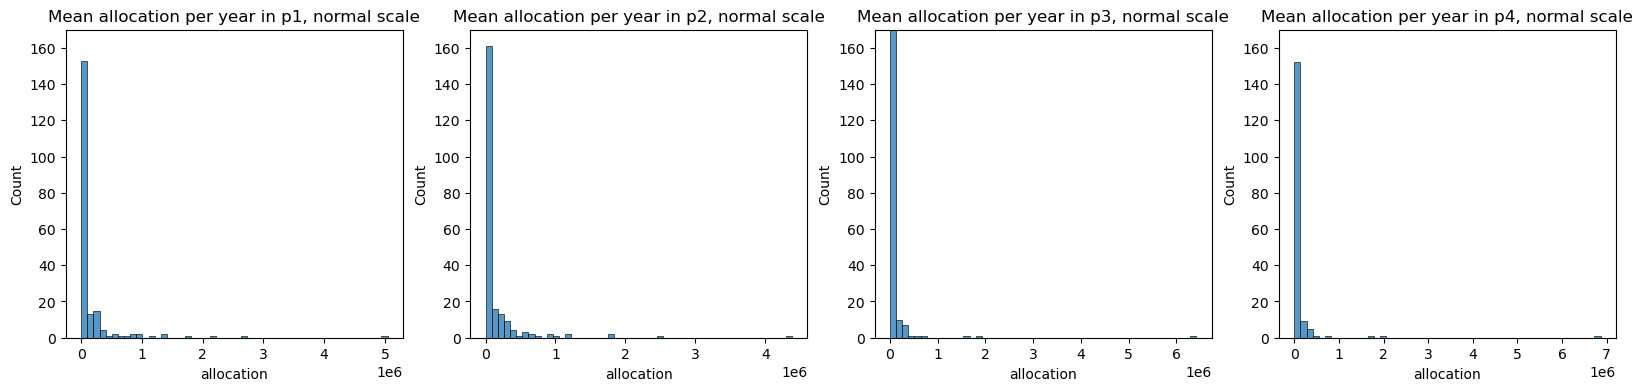

In [219]:
_, axes = plt.subplots(1, 4,  figsize=(20, 4))
axes = axes.flatten()
for i, phase in enumerate(allocation_phase_cols.keys()):
    sns.histplot(data=df, x=f'allocation_mean_{phase}', ax=axes[i], bins=50)
    axes[i].set(title=f'Mean allocation per year in {phase}, normal scale', xlabel='allocation')
    axes[i].set_ylim(0, 170)

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

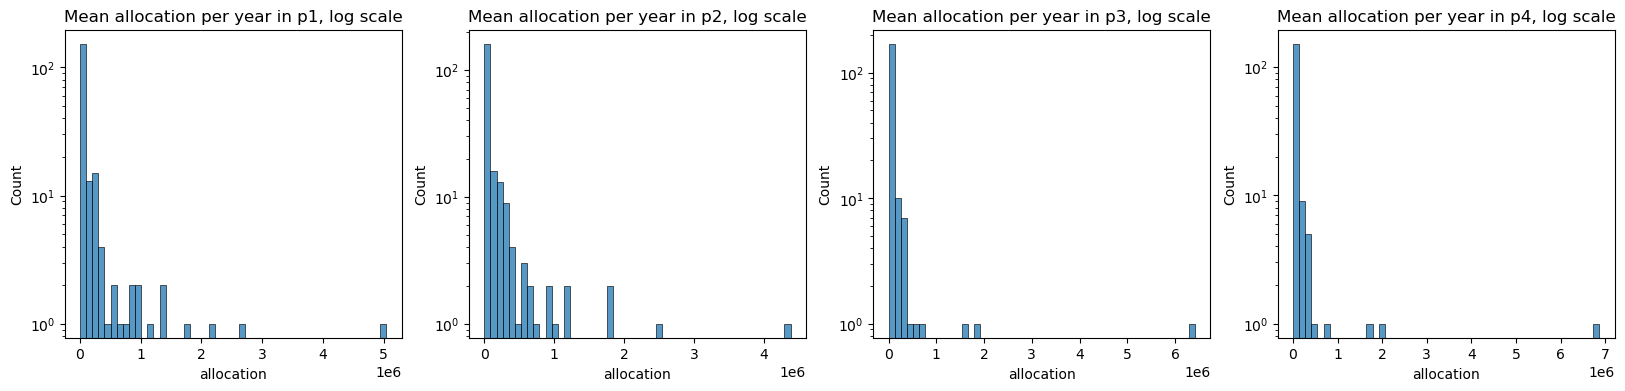

In [220]:
_, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()
for i, phase in enumerate(allocation_phase_cols.keys()):
    sns.histplot(data=df, x=f'allocation_mean_{phase}', ax=axes[i], bins=50)
    axes[i].set(title=f'Mean allocation per year in {phase}, log scale', xlabel='allocation')
    axes[i].set_yscale('log')

In [273]:
allocation_over_years = df.apply(lambda row: row[[c for c in df.columns if 'allocation2' in c]].values, axis=1).tolist()

In [274]:
allocation_cols = [c for c in df.columns if 'allocation2' in c]

c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

[[Text(-2.5, 0, '2005'),
  Text(0.0, 0, '2006'),
  Text(2.5, 0, '2007'),
  Text(5.0, 0, '2008'),
  Text(7.5, 0, '2009'),
  Text(10.0, 0, '2010'),
  Text(12.5, 0, '2011'),
  Text(15.0, 0, '2012'),
  Text(17.5, 0, '2013'),
  Text(20.0, 0, '2014'),
  Text(22.5, 0, '2015')]]

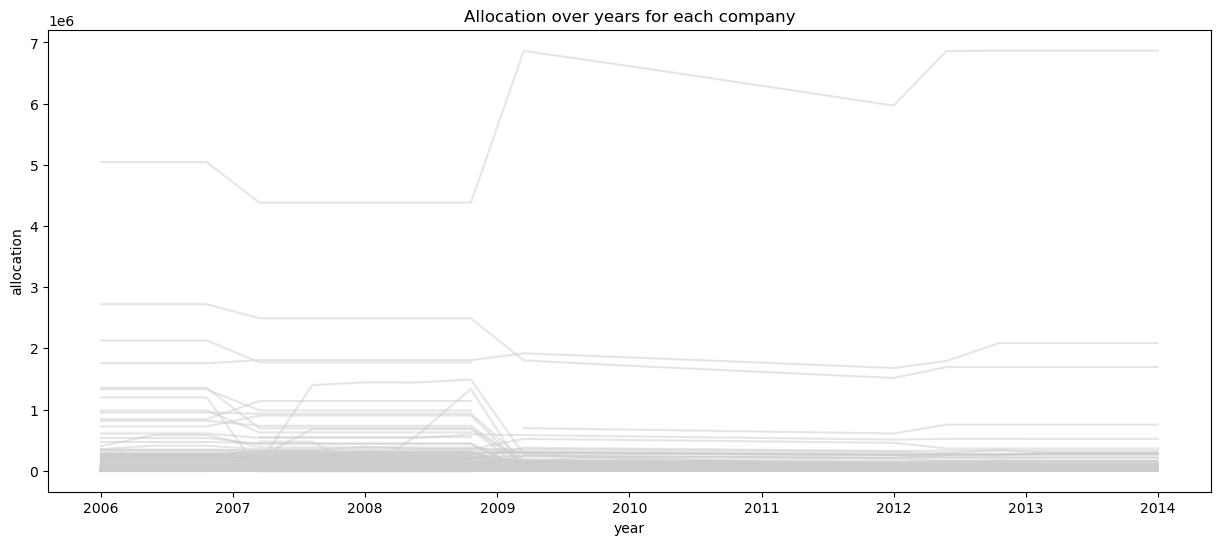

In [275]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
for company_allocation in allocation_over_years:
    sns.lineplot(y=company_allocation, x=range(len(company_allocation)), c='#cccccc', alpha=0.5, zorder=0)
ax.set(title='Allocation over years for each company', xlabel='year', ylabel='allocation')
ax.set(xticklabels=range(2005, 2026))

In [268]:
allocation_cols = [c for c in df.columns if 'allocation2' in c]
allocation_over_years = df[df[allocation_cols].max(axis=1) < 100000].apply(lambda row: row[[c for c in df.columns if 'allocation2' in c]].values, axis=1).tolist()

In [277]:
df

,InstallationName,LatestUpdate_p1,LatestUpdate_p2,LatestUpdate_p3,LatestUpdate_p4,allocation2005_p1,allocation2006_p1,allocation2007_p1,allocation2008_p2,allocation2009_p2,...,allocation_max_p1,allocation_total_p2,allocation_mean_p2,allocation_max_p2,allocation_total_p3,allocation_mean_p3,allocation_max_p3,allocation_total_p4,allocation_mean_p4,allocation_max_p4
0,Calmit Bad Ischl,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:47:52,2021-07-26 15:40:18,44894.0,44894.0,44894.0,43171.0,43171.0,...,44894.0,215855.0,43171.0,43171.0,316312.0,39539.000,42159.0,166080.0,33216.0,33216.0
1,Breitenfelder Edelstahl Mitterdorf,2009-05-08 09:13:58,2011-02-28 10:33:50,2013-12-19 15:48:16,2023-09-12 12:11:53,8492.0,8492.0,8492.0,14063.0,17155.0,...,8492.0,110505.0,22101.0,26429.0,113433.0,14179.125,15118.0,77203.0,15440.6,16007.0
2,Ziegelwerk Danreiter Ried im Innkreis,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:48:12,2023-09-12 12:11:54,7397.0,7397.0,7397.0,5927.0,5927.0,...,7397.0,29635.0,5927.0,5927.0,26221.0,3277.625,3494.0,22085.0,4417.0,4572.0
3,Wienerberger Blindenmarkt,2009-05-08 09:13:58,NaN,NaN,NaN,8335.0,8335.0,8335.0,NaN,NaN,...,8335.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,FunderMax Wr. Neudorf,2009-05-08 09:13:58,2009-05-08 09:13:58,2013-12-19 15:47:46,2022-09-23 10:06:00,24003.0,24003.0,24003.0,27343.0,27343.0,...,24003.0,136715.0,27343.0,27343.0,194905.0,24363.125,26223.0,128152.0,25630.4,25877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vertellus Specialties Austria,NaN,NaN,2017-01-23 14:36:10,2021-07-26 15:40:46,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,274398.0,54879.600,70682.0,290180.0,58036.0,58036.0
258,Boehringer Ingelheim Wien,NaN,NaN,2021-12-22 11:50:06,2023-04-11 12:12:37,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.000,0.0,16171.0,3234.2,3383.0
259,Wien Energie - FHKW Arsenal 2,NaN,NaN,NaN,2023-09-12 12:11:54,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,9188.0,1837.6,2707.0
260,TIWAG - Notfallheizwerk Lienz III,NaN,NaN,NaN,2021-07-26 15:40:46,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,130.0,26.0,26.0


c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alina\anaconda3\envs\modsim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

[[Text(-2.5, 0, '2005'),
  Text(0.0, 0, '2006'),
  Text(2.5, 0, '2007'),
  Text(5.0, 0, '2008'),
  Text(7.5, 0, '2009'),
  Text(10.0, 0, '2010'),
  Text(12.5, 0, '2011'),
  Text(15.0, 0, '2012'),
  Text(17.5, 0, '2013'),
  Text(20.0, 0, '2014'),
  Text(22.5, 0, '2015')]]

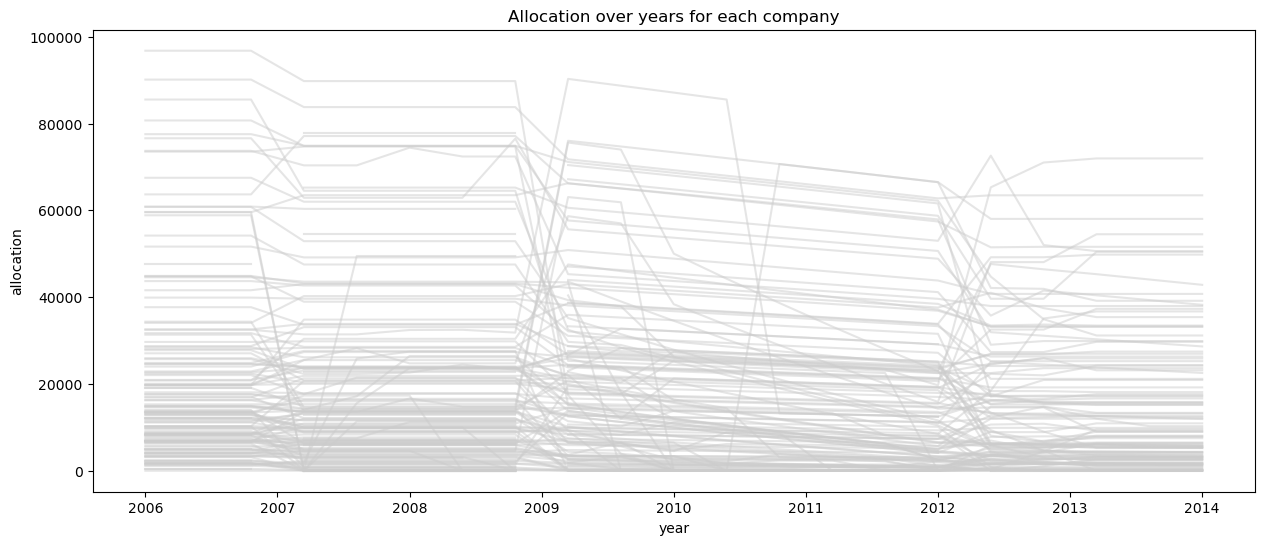

In [269]:

_, ax = plt.subplots(1, 1, figsize=(15, 6))
for company_allocation in allocation_over_years:
    sns.lineplot(y=company_allocation, x=range(len(company_allocation)), c='#cccccc', alpha=0.5, zorder=0)
ax.set(title='Allocation over years for each company', xlabel='year', ylabel='allocation')
ax.set(xticklabels=range(2005, 2026))